In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

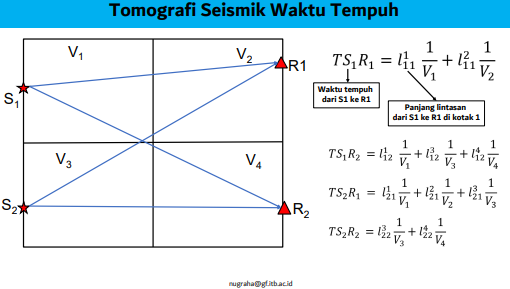

In [2]:
s1 = [0,750]
s2 = [0, 200]
r1 = [1000, 900]
r2 = [1000, 200]

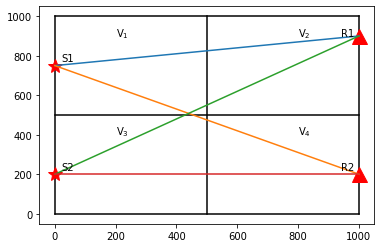

In [3]:
ax1 = plt.plot([0 for i in range(1000)], np.arange(0,1000), 'black')
ax2 = plt.plot(np.arange(0,1000), [0 for i in range(1000)], 'black')
ax3 = plt.plot([1000 for i in range(1000)], np.arange(0,1000), 'black')
ax4 = plt.plot(np.arange(0,1000), [1000 for i in range(1000)], 'black')
ax_hor = plt.plot([500 for i in range(1000)], np.arange(0,1000), 'black')
ax_ver = plt.plot(np.arange(0,1000), [500 for i in range(1000)], 'black')

s1_plot = plt.plot(s1[0], s1[1], marker="*", markersize=15, color="red")
s2_plot = plt.plot(s2[0], s2[1], marker="*", markersize=15, color="red")
r1_plot = plt.plot(r1[0], r1[1], marker="^", markersize=15, color="red")
r2_plot = plt.plot(r2[0], r2[1], marker="^", markersize=15, color="red")

plt.annotate("S1", xy=[s1[0]+20, s1[1]+20])
plt.annotate("S2", xy=[s2[0]+20, s2[1]+20])
plt.annotate("R1", xy=[r1[0]-60, r1[1]])
plt.annotate("R2", xy=[r2[0]-60, r2[1]+20])
plt.annotate("V$_1$", xy=[200, 900])
plt.annotate("V$_2$", xy=[800, 900])
plt.annotate("V$_3$", xy=[200, 400])
plt.annotate("V$_4$", xy=[800, 400])

plt.plot([s1[0],r1[0]], [s1[1],r1[1]])
plt.plot([s1[0],r2[0]], [s1[1],r2[1]])
plt.plot([s2[0],r1[0]], [s2[1],r1[1]])
plt.plot([s2[0],r2[0]], [s2[1],r2[1]])

plt.ylim([-51, 1050])
plt.xlim([-51, 1050])
plt.show()

In [5]:
def persamaan_tomografi(s, r):
    jarak = np.sqrt((r[0] - s[0])**2 + (r[1] - s[1])**2)
    
    a = np.zeros(1000)
    a[0] = s[0]
    b = np.zeros(1000)
    b[0] = s[1]
    
    koordinat = []
    koordinat.append([a[0],b[0]])
    
    kotak = set()
    for i in range(1,1000):
        a[i] = a[i-1] - ((s[0]-r[0])/999)
        b[i] = b[i-1]- ((s[1]-r[1])/999)
        koordinat.append([a[i], b[i]])
        
            
        if a[i] < 500 and b[i] > 500:
            kotak.add("l1 1/v1")
            
        elif a[i] > 500 and b[i] > 500:
            kotak.add("l2 1/v2")
            
        elif a[i] < 500 and b[i] < 500:
            kotak.add("l3 1/v3")
            
        elif a[i] > 500 and b[i] < 500:
            kotak.add("l4 1/v4")
        
    urutan_angka = {"l1 1/v1": 1, "l2 1/v2": 2, "l3 1/v3": 3, "l4 1/v4": 4}
    kotak_urut = sorted(kotak, key=lambda x: urutan_angka[x])
    
    return f" + ".join(kotak_urut)
    
    
jarak1 =  persamaan_tomografi(s1,r2)
jarak1

'l1 1/v1 + l3 1/v3 + l4 1/v4'